# Figure X: Retrieval evidences

## Notebook setup

In [2]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [47]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

<IPython.core.display.Javascript object>

## [Dowload data]()

This should be placed in a folder named `data` in the same level as this notebook

## Plot

In [74]:
# Load
base_dir = "data/retr_evidence"
df_Delta_lnZ, df_Delta_lnZ_err, species_min, model_min = utils.get_evidences(base_dir)
print(f"Minimul log-evidence: ({species_min}, {model_min})")
display(df_Delta_lnZ)

Minimul log-evidence: (K, clear)


,Na,K,TiO,Na_K,Na_TiO,K_TiO,Na_K_TiO
clear,4.228008,0.000000,6.470431,3.961596,5.965399,5.906551,5.620903
clear+cloud,3.631123,1.485933,5.398483,3.179458,5.170945,4.996205,4.870079
clear+haze,3.684933,2.223177,5.362364,3.221512,5.124867,4.944949,4.720639
clear+cloud+haze,2.848549,1.737777,4.479787,2.382097,4.248182,4.153051,3.856953
clear+spot,4.241980,3.812417,4.241815,3.685709,3.997720,3.751752,3.506001
clear+spot+cloud,3.174436,2.867850,3.291967,2.695057,3.033652,2.801135,2.538111
clear+spot+haze,3.034682,2.817973,3.120746,2.614493,2.828451,2.655219,2.427965
clear+spot+cloud+haze,2.159865,1.938158,2.208348,1.660904,1.910795,1.798888,1.529130


<IPython.core.display.Javascript object>

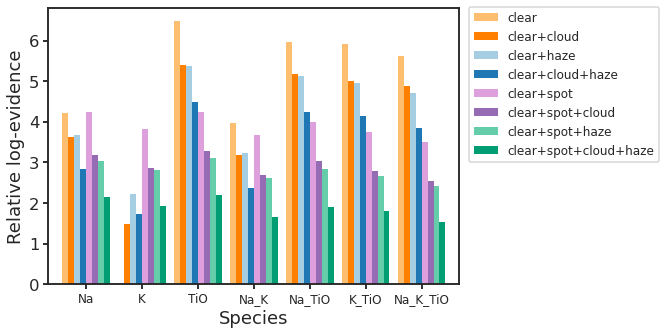

<IPython.core.display.Javascript object>

In [73]:
# Plot
fig, ax = plt.subplots(figsize=FIG_WIDE)

p = df_Delta_lnZ.transpose().plot(
    ax=ax,
    kind="bar",
    width=0.85,
    lw=0,
    capsize=3,
    ecolor="grey",
    # yerr=df_Delta_lnZ_err.transpose(), # Very small, omitted for visibility
    # legend=False,
    xlabel="Species",
    ylabel="Relative log-evidence",
)

plt.xticks(fontsize=12, rotation=0)
p.legend(loc="upper right", fontsize="12", bbox_to_anchor=(1.5, 1.028))
fig.tight_layout()
fig.set_size_inches(FIG_WIDE)

utils.savefig("../paper/figures/retrieval_evidence/evidence_summary.pdf")